# <font color='red'> [1] Build the model and the structure of the metabolic network </font> 

## <font color='green'> [1.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [1.2] Creation of an empty model </font> 

Let's create a model as a variable

In [2]:
model = MODEL()

## <font color='green'> [1.3] Load of an existing model </font> 

Instead of creating a model from nothing, you can load an existing model.

You can create a linear network of $n$ metabolites

In [3]:
model.creat_linear(n=4)

In [4]:
model.enzymes.add_to_all_reaction()
model.parameters.add_externals()
model.parameters.add_enzymes()
model.elasticity.s.half_satured()
model.parameters.remove("Temperature")

Name of the removed parameter : Temperature


In [5]:
model.parameters

                       Mean values Standard deviation
meta_0_para                    1.0                1.0
meta_3_para                    1.0                1.0
enzyme_reaction_0_para         1.0                1.0
enzyme_reaction_1_para         1.0                1.0
enzyme_reaction_2_para         1.0                1.0

In [6]:
model.parameters.change("meta_0_para", SD = 0)
model.parameters.change("meta_3_para", SD = 0)

In [8]:
model.MI

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
meta_3_para,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
enzyme_reaction_0_para,-0.0,-0.0,inf,-0.000000,-0.000000,0.549306,0.091161,0.202733,0.202733,0.202733
enzyme_reaction_1_para,-0.0,-0.0,-0.000000,inf,-0.000000,0.091161,0.091161,0.202733,0.202733,0.202733
enzyme_reaction_2_para,-0.0,-0.0,-0.000000,-0.000000,inf,0.091161,0.549306,0.202733,0.202733,0.202733
meta_1,-0.0,-0.0,0.549306,0.091161,0.091161,inf,0.143841,-0.000000,-0.000000,-0.000000
meta_2,-0.0,-0.0,0.091161,0.091161,0.549306,0.143841,inf,-0.000000,-0.000000,-0.000000
reaction_0,-0.0,-0.0,0.202733,0.202733,0.202733,-0.000000,-0.000000,inf,inf,inf
reaction_1,-0.0,-0.0,0.202733,0.202733,0.202733,-0.000000,-0.000000,inf,inf,inf
reaction_2,-0.0,-0.0,0.202733,0.202733,0.202733,-0.000000,-0.000000,inf,inf,inf


In [9]:
model.parameters.df

,Mean values,Standard deviation
meta_0_para,1.0,0
meta_3_para,1.0,0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


In [10]:
model.parameters.change("enzyme_reaction_0_para", SD=1.)
model.parameters.change("enzyme_reaction_1_para", SD=1.)
model.parameters.change("enzyme_reaction_2_para", SD=1.)
model.parameters.change("meta_0_para", SD=1.)
model.parameters.change("meta_3_para", SD=1.)

In [11]:
model.regulations.add("reg1", "reaction_0", "meta_2", coefficient=-.5)

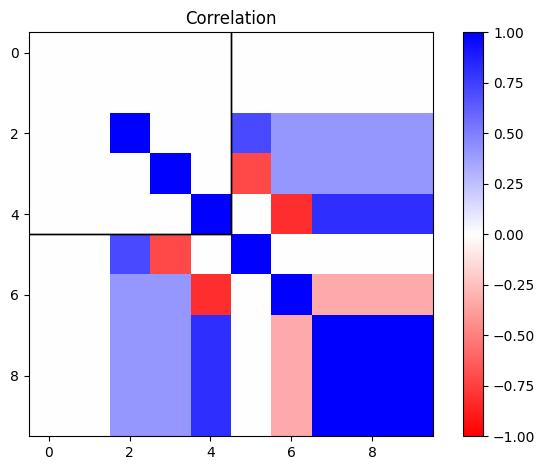

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x70ff30555510>)

In [12]:
model.plot(result="rho")

By default, the first and last metabolites are external

In [13]:
model.graphic_interface()

LinAlgError: Singular matrix

/tmp/ipykernel_24362/157585696.py:16: RuntimeWarning: invalid value encountered in log
  y_H = [np.log(2*np.pi*np.e) + np.log(x_i-mu) for x_i in x]


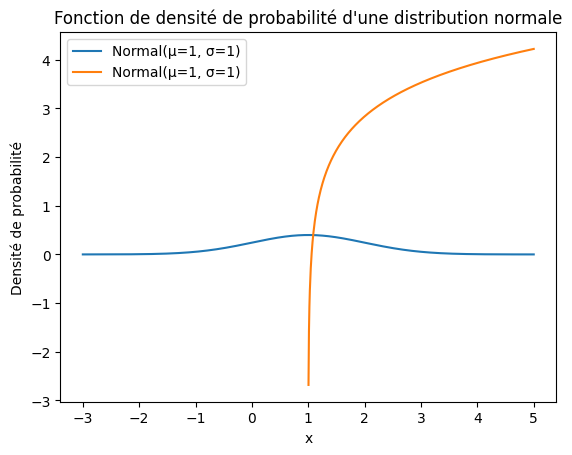

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 1000
# Paramètres de la distribution normale
mu = 1    # moyenne
sigma = 1 # écart-type

# Générer les données pour l'axe x (valeurs de la variable aléatoire)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, N)

# Calculer la densité de probabilité pour chaque valeur de x
y_normal = norm.pdf(x, mu, sigma)

y_H = [np.log(2*np.pi*np.e) + np.log(x_i-mu) for x_i in x]

# Tracer la courbe
plt.plot(x, y_normal, label=f'Normal(μ={mu}, σ={sigma})')
plt.plot(x, y_H, label=f'Normal(μ={mu}, σ={sigma})')

# Ajouter des labels et une légende
plt.title('Fonction de densité de probabilité d\'une distribution normale')
plt.xlabel('x')
plt.ylabel('Densité de probabilité')
plt.legend()

# Afficher le graphique
plt.show()

In [8]:
fzerht:;

SyntaxError: invalid syntax (3346595981.py, line 1)

In [4]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW


In [5]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,True,1.0,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


The stoichiometric matrix is already build

In [6]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


You can also load models from SBML, COBRA and SBTAB with model.load...

## <font color='green'> [1.4] Change a reaction and metabolite </font> 

Modifying the dictionary of the metabolite in the dataframe of reaction change also the dataframes of metabolites and stoichiometry

In [ ]:
model.reactions.change(name="reaction_0", metabolites={'new_meta':-2, 'meta_1':1}, k_eq=1.5, reversible=False, flux=1.5)

In [ ]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


In [ ]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


In [ ]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0
meta_2,0.0,1.0,-1.0
meta_3,0.0,0.0,1.0
new_meta,-2.0,0.0,0.0


The same for the metabolite

In [ ]:
model.metabolites.change("meta_0", concentration=2.0)

In [ ]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


## <font color='green'> [1.5] Add reaction and metabolite </font> 

To add a reaction, only its name as input is indispensable, but adding a dictionary of the metabolite used in the reaction as a key linked to their stoichiometric coefficients allows the module to add automatically those metabolites to the metabolite dataframe and their coefficient to the stoichiometric matrix

In [ ]:
model.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, flux=1.0)

In [ ]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


If you add a reaction that is already in the model, it is called the model. reactions.change() instead 

In [ ]:
metabolite_reaction2 = {"C" : -1.0,
                       "O2"  : -1.0,
                       "CO2"  : 1.0}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction2, k_eq = 1.0, flux=1.0)

In [ ]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'O2': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


Add a reaction with specified metabolite and stoichiometric coefficient automatically adds them to the model

In [ ]:
model.N
# Same
model.Stoichio_matrix_pd

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
O2,0.0,0.0,0.0,-1.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


## <font color='green'> [1.6] Removing a reaction and metabolite </font> 

It is also possible to remove a metabolite or a reaction from the model

In [ ]:
model.metabolites.remove("O2")
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
C,False,1.0,mmol/gDW
CO2,False,1.0,mmol/gDW


Removing a metabolite or a reaction remove also every mention of it in the stoichiometric matrix and elasticities matrix

Same for the mention of the metabolite on the reaction dataframe

In [ ]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


In [ ]:
model.N

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


In [ ]:
model.reactions.remove("combustion")

In [ ]:
model.reactions.remove(name="combustion")
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


## <font color='green'> [1.7] Stoichiometric matrix from an existant one </font> 

##### You can also change the stoichiometric matrix

You have 2 options :
- Attribute to the stoichiometric matrix a Pandas Dataframe, whatever the size, and the program will create a new model based on the metabolites (rows) and reactions (columns) of the dataframe
- Attribute a Numpy array, and the program will change the value of the coefficients of the matrix

In [ ]:
reactions = {'Combustion': [1. , -1., -0.5],
             'Reaction_2': [0. ,  0.,   1. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

model.Stoichio_matrix_pd = dataframe

And the metabolites and reactions dataframes are automatically updated !

In [ ]:
model.N

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,1.0


In [ ]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,True,1.0,mmol/gDW/h
Reaction_2,{'O2': 1.0},1.0,True,1.0,mmol/gDW/h


In [ ]:
model.metabolites.df

,External,Concentration,Unit
H2O,False,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


# <font color='red'> [2] Play with the dynamic of model </font> 

In [ ]:
model.creat_linear(4)

## <font color='green'> [2.1] Parameters </font> 

By default, the temperature is in the parameters dataframe

In [ ]:
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


You can add any parameter with its mean values and standard deviation to represent its uncertainty

In [ ]:
model.parameters.add("pH", mean=7., Standard_deviation=2.)
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
pH,7.0,2.0


You can also remove a parameter

In [ ]:
model.parameters.remove("Temperature")
model.parameters.df

Name of the removed parameter : Temperature


,Mean values,Standard deviation
pH,7.0,2.0


You can also consider the external metabolite as parameter of the model

In [ ]:
model.parameters.add_externals()

## <font color='green'> [2.2] Enzymes </font> 

You can add enzyme to the model and liked them to reactions

In [ ]:
model.enzymes.add("enzyme_test", mean=1, reaction_linked=["reaction_0", "reaction_2"])
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"


You can also use the model.enzymes.add_to_all_reaction() method to create an enzyme linked to each reaction, with the name "enzyme_{reaction_name}"

In [ ]:
model.enzymes.add_to_all_reaction()
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


In [ ]:
model.enzymes.remove("enzyme_test")
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


Finally, you can add the enzyme as parameters, they will be added with their name of enzyme + "_para"

In [ ]:
model.parameters.add_enzymes()
model.parameters.df

,Mean values,Standard deviation
pH,7.0,2.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [2.3] Operons </font> 

You can create a dependency between enzymes by specifying if they are linked by an operon

In [ ]:
model.operons.add("operon_lactose", enzymes_linked=["enzyme_reaction_0", "enzyme_reaction_2"], mixed_covariance=0.42)
model.operons.df

NameError: The input enzyme 'enzyme_reaction_0' is not in the enzymes dataframe !


By default, an operon is activated, you can inactivate it at any moment

In [ ]:
model.operons.inactivate("operon_lactose")

NameError: The operon operon_lactose is not in the operon dataframe, please enter a valide name 


## <font color='green'> [2.4] Elasticity matrix of parameters </font> 

In [ ]:
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,1.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,1.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.p.change() (slowest but there is a security to check the input)

In [ ]:
model.elasticity.p.change(flux_name="reaction_0", parameter_name="enzyme_reaction_0_para", value=-2.)
model.elasticity.p.df.at["reaction_1", "enzyme_reaction_1_para"] = 3
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,-2.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,3.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


## <font color='green'> [2.5] Elasticities matrix of internal metabolites </font> 

Only the internal metabolites are in the $\varepsilon_s$ elasticiy matrix

In [ ]:
model.elasticity.s.df

,meta_1,meta_2
reaction_0,0,0
reaction_1,0,0
reaction_2,0,0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.s.change() (slowest but there is a security to check the input)

In [ ]:
model.elasticity.s.df.at["reaction_0", "meta_1"] = 1
model.elasticity.s.change("reaction_2", "meta_2", -1)
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,0
reaction_1,0,0
reaction_2,0,-1


Or by adding an entire Numpy matrix of the same size

In [ ]:
matrix_data = np.array([[1,-4],
                        [-2,5],
                        [3,-6]])

model.elasticity.s.df[:] = matrix_data
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,-4
reaction_1,-2,5
reaction_2,3,-6


You can assume that the enzymes are half-saturated, the elasticity is therefore equal to $-0.5N^T$

In [ ]:
model.elasticity.s.half_satured()
model.elasticity.s.df

,meta_1,meta_2
reaction_0,-0.5,-0.0
reaction_1,0.5,-0.5
reaction_2,-0.0,0.5


# <font color='red'> [3] Post-simulation analysis </font> 

In [ ]:
import sys
sys.path.append('../')

from main import *

model = MODEL()

In [ ]:
model.creat_linear(4)
model.parameters.add_externals()
model.enzymes.add_to_all_reaction()
model.parameters.add_enzymes()
model.parameters.remove("Temperature")
model.elasticity.s.half_satured()

 
Name of the removed parameter : Temperature


In [ ]:
model.elasticity.s.df

,meta_1,meta_2
reaction_0,-0.5,-0.0
reaction_1,0.5,-0.5
reaction_2,-0.0,0.5


In [ ]:
matrix_data = np.array([[ -1.  ,   0],
                        [  0.5 , -5],
                        [  0.  ,  5]])

model.elasticity.s.df[:] = matrix_data
model.elasticity.s.df

,meta_1,meta_2
reaction_0,-1.0,0.0
reaction_1,0.5,-5.0
reaction_2,0.0,5.0


In [ ]:
model.elasticity.s.fill_sub_elasticity()

In [ ]:
model.elasticity.s.regulation

,meta_1,meta_2
reaction_0,0.128007,0.219976
reaction_1,0.259928,0.566640
reaction_2,-0.064285,-0.167879


In [ ]:
model.regulations.add("reg_1", regulated="reaction_0", regulator="meta_2", coefficient=-0.5)
model.regulations.add("reg_2", regulated="reaction_2", regulator="meta_1", coefficient=0.5)

In [ ]:
model.elasticity.s.df

,meta_1,meta_2
reaction_0,0.916103,-0.075059
reaction_1,0.259928,0.777602
reaction_2,0.435715,-0.167879


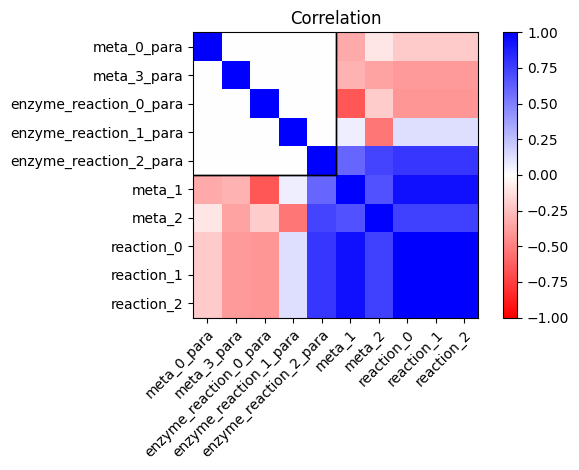

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7b787e49b8b0>)

In [ ]:
model.plot(result="rho", label=True)

## <font color='green'> [3.1] Structure's variable </font> 

The stoichiometric matrix $N$ (or $S$ for the culturless peoples)

In [ ]:
model.Stoichio_matrix_pd

You also can get a reduced version of the stoichiometric matrix and the link matrix associated

In [ ]:
L, N_r = model.Link_matrix
print("Link matrix :\n",L)
N_r

## <font color='green'> [3.2] Jacobian matrix </font> 

The Jacobian matrix is recomputed each time there is a modification in $N$ or $E_s$, else it is stored in a cache

In [ ]:
model.Jacobian

In [ ]:
model.Jacobian_reversed

## <font color='green'> [3.3] MCA response coefficient </font> 

Sub element of the response matrix : $R^s_p$ and $R^v_p$

In [ ]:
model.R_v_p

In [ ]:
model.R_s_p

The entire response matrix is constituted of $R^s_p$ and $R^v_p$ as a block matrix

In [ ]:
model.R

## <font color='green'> [3.4] Covariance, Correlation and Mutual Information </font> 


### <font color='white'> [3.4.1] Covariance</font> 

The program can compute the covariance matrix of the model by a matrix product of the response matrix and the covariance matrix of the parameters (a multivariate normal distribution independent by default) to study the transmission of information through the system

In [ ]:
model.covariance

### <font color='white'> [3.4.2] Corelation </font> 

You can therefore compute the correlation

In [ ]:
model.correlation

### <font color='white'> [3.4.3] Entropy </font> 

In [ ]:
model.entropy

You can also study the entropy between groups of elements of the model

Taking as input :
- [] -> Every element is studied individually
- dict -> name of the groups as keys and list of str of the elements as values
- list of list -> list of groups with default names

In [ ]:
model.group_entropy([["meta_0_para", "meta_1"],["enzyme_reaction_0_para", "reaction_2"]])

### <font color='white'> [3.4.4] Conditional entropy </font> 

In [ ]:
model.entropy_conditional

### <font color='white'> [3.4.5] Joint entropy </font> 

In [ ]:
model.joint_entropy

### <font color='white'> [3.4.6] Mutual Information </font> 

In [ ]:
model.MI

You can also plot a histogram of the mutual information and conditional entropy (the sum represents its entropy) of a certain element with every other elements of the model

In [ ]:
model.plot_entropy("meta_1")

or you can do the inverse and plot a histogram of every elements of the model compare to an certain element

In [ ]:
model.plot_entropy("meta_1", reversed=True)

## <font color='green'> [3.5] Sampling </font> 


You can sample some data from the model and look for the mean value of the correlation or mutual information matrix

### <font color='white'> [3.5.1] Updating the dataframe of the sampling data </font> 

In [ ]:
model.data_sampling

You have to add to the sampling dataframe the element of the model that you want to sample

In [ ]:
model.add_sampling_data(["reaction_0","enzyme_reaction_1_para"], "elasticity_p", mean = True)

model.data_sampling

### <font color='white'> [3.5.2] Launch of the sampling loop </font> 

In [ ]:
model.sampling(N=10, result="rho", seed_constant=False)

# <font color='red'> [4] Graph of the result </font> 

## <font color='green'> [4.1] Heat map </font> 


You can display some previous results on a heat map

In [ ]:
model.plot(result="rho", title="Corelation")

## <font color='green'> [4.2] Boxplot </font> 


You can open a window to display a graphic interface to study the influence of the fixation of a variable

In [ ]:
#model.graphic_interface()

If you want to study the influence of multiple fixations of elements, use .boxplot() or .group_entropy_fixed_vector instead

## <font color='green'> [4.3] Eschermap </font> 


If you have a model file and a map file (both in .json), you can display things on an Esher map

In [ ]:
model_path = "../Exemples/linear/model_linear.json"
map_path = "../Exemples/linear/map_linear.json"

### <font color='white'> [4.3.1] Display the reference state </font> 

In [ ]:
model.escher_reference(model_json=model_path, map_json=map_path)

### <font color='white'> [4.3.2] Display MI or correlation </font> 

You can display the mutual information or the correlation between every metabolite and an element of the model

In [ ]:
model.escher_information(studied="enzyme_reaction_1_para", result="rho", model_json=model_path, map_json=map_path)

### <font color='white'> [4.3.3] Display mean deviation </font> 

You can also display on Escher map of the mean deviation that occurs when you fixe an element of the model to a certain value

In [ ]:
model.escher_mean_deviation(fixed_element="enzyme_reaction_1_para", fixed_value=1.5, model_json=model_path, map_json=map_path)

In [ ]:
t_0 = time.time()

N_ela = 3
import random

modified_elasticity = []
elasticity_value = []

for i in range(N_ela) :
    flux = random.choice(model.elasticity.s.df.index)
    meta = random.choice(model.elasticity.s.df.columns)
    modified_elasticity.append([flux, meta])

    elasticity_value.append(np.random.uniform(-1.0, 1.0))

print()
print(modified_elasticity)
print(elasticity_value)
print()
print()

model.MOO(modified_elasticity, elasticity_value, print_result=False)

t_end = time.time() - t_0
print(f"final time : {t_end}")

In [ ]:
model.real_data["Correlation"]